In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/control_it.csv')

In [3]:
df.columns

Index(['voiceID', 'localJitter', 'localabsoluteJitter', 'rapJitter',
       'ppq5Jitter', 'ddpJitter', 'localShimmer', 'localdbShimmer',
       'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'ac',
       'nth', 'htn', 'median_pitch', 'meanF0', 'stdevF0', 'min_pitch',
       'max_pitch', 'n_pulses', 'n_periods', 'mean_period',
       'standard_deviation_period', 'fraction_unvoiced_frames',
       'num_voice_breaks', 'degree_voice_breaks', 'class'],
      dtype='object')

In [4]:
df.head()

,voiceID,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,...,min_pitch,max_pitch,n_pulses,n_periods,mean_period,standard_deviation_period,fraction_unvoiced_frames,num_voice_breaks,degree_voice_breaks,class
0,B1ACNAGRER49F210320170916.wav,0.027563,0.000073,0.011999,0.014552,0.035996,0.127578,1.202943,0.052486,0.075037,...,137.442,527.547,3709,3556,0.002634,0.000563,0.47395,47.0,0.51332,0
1,B1ACNUTCOC40M230320171121.wav,0.023413,0.000063,0.010166,0.012283,0.030497,0.120930,1.152869,0.045974,0.069131,...,214.902,522.564,4242,4085,0.002732,0.000518,0.50100,49.0,0.54580,0
2,B1AGNIGNEE54F230320171018.wav,0.022856,0.000064,0.010395,0.011400,0.031185,0.119258,1.096128,0.048339,0.069816,...,223.186,526.174,4394,4233,0.002763,0.000576,0.53607,43.0,0.56002,0
3,B1AMULCAAS94M100120171016.wav,0.034014,0.000104,0.015382,0.017247,0.046147,0.127031,1.227445,0.051471,0.073664,...,115.548,508.225,2567,2424,0.003121,0.000714,0.42685,44.0,0.44646,0
4,B1APGANRET55F170320171104.wav,0.020658,0.000090,0.010893,0.010895,0.032678,0.196675,1.350282,0.096671,0.109729,...,84.063,527.074,5647,5366,0.004170,0.001960,0.26152,46.0,0.42950,0


In [5]:
df=df.loc[:, df.columns !='voiceID']

In [5]:
df1=pd.read_csv('Data/pd_it.csv')

In [6]:
df1=pd.read_csv('Data/Srilanka.csv')
df1=df1.loc[:, df1.columns !='Subject ID']
df1.columns=df.columns

In [6]:
df=pd.concat((df,df1))

In [17]:
df=df.dropna()

In [18]:
X=df.loc[:, df.columns !='class']
X=X.loc[:, X.columns !='voiceID']
X

,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,...,stdevF0,min_pitch,max_pitch,n_pulses,n_periods,mean_period,standard_deviation_period,fraction_unvoiced_frames,num_voice_breaks,degree_voice_breaks
0,0.027563,0.000073,0.011999,0.014552,0.035996,0.127578,1.202943,0.052486,0.075037,0.128051,...,79.970543,137.442,527.547,3709,3556,0.002634,0.000563,0.47395,47.0,0.51332
1,0.023413,0.000063,0.010166,0.012283,0.030497,0.120930,1.152869,0.045974,0.069131,0.125031,...,66.181343,214.902,522.564,4242,4085,0.002732,0.000518,0.50100,49.0,0.54580
2,0.022856,0.000064,0.010395,0.011400,0.031185,0.119258,1.096128,0.048339,0.069816,0.106198,...,81.283591,223.186,526.174,4394,4233,0.002763,0.000576,0.53607,43.0,0.56002
3,0.034014,0.000104,0.015382,0.017247,0.046147,0.127031,1.227445,0.051471,0.073664,0.143142,...,62.581340,115.548,508.225,2567,2424,0.003121,0.000714,0.42685,44.0,0.44646
4,0.020658,0.000090,0.010893,0.010895,0.032678,0.196675,1.350282,0.096671,0.109729,0.089241,...,121.019897,84.063,527.074,5647,5366,0.004170,0.001960,0.26152,46.0,0.42950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.003732,0.000022,0.002014,0.002061,0.006042,0.022310,0.192040,0.011445,0.012812,0.016640,...,2.123320,163.334,183.920,919,918,0.005937,0.000076,0.15871,0.0,0.00000
433,0.001447,0.000004,0.000721,0.000872,0.002164,0.011706,0.100186,0.006535,0.007289,0.008502,...,3.177220,394.705,412.633,841,840,0.002501,0.000020,0.00000,0.0,0.00000
434,0.004921,0.000012,0.002695,0.002887,0.008086,0.020926,0.173922,0.011309,0.012486,0.017906,...,3.297544,400.345,416.263,877,876,0.002446,0.000024,0.00000,0.0,0.00000
435,0.001815,0.000009,0.000882,0.000886,0.002647,0.009250,0.085882,0.002700,0.003594,0.008378,...,3.430511,187.229,218.339,1145,1144,0.004748,0.000080,0.15920,0.0,0.00000


In [19]:
from collections import Counter
Y=df['class']
Counter(Y)

Counter({0: 393, 1: 435})

### Correlation Matrix

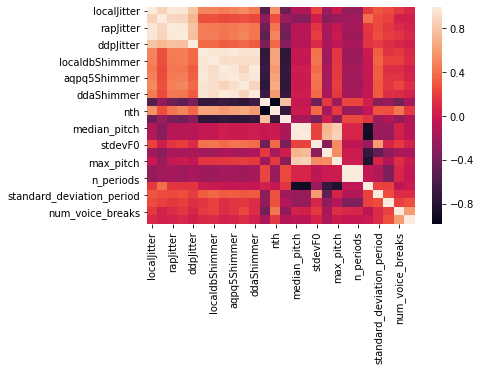

In [18]:
%matplotlib inline
ax = sns.heatmap(X.corr())

### Highly correlated columns

In [19]:
corr=np.array(X.corr())
for i in range(26):
    for j in range(i+1,26):
        if(corr[i][j]>0.97):
            print(X.columns[i],X.columns[j],corr[i][j])

localJitter ppq5Jitter 0.9754946861594324
rapJitter ppq5Jitter 0.9797827766341928
localShimmer aqpq5Shimmer 0.9826926160240672
apq3Shimmer aqpq5Shimmer 0.9713134524256306
apq3Shimmer ddaShimmer 0.9999999275203098
aqpq5Shimmer ddaShimmer 0.9713127688794209
median_pitch meanF0 0.9822992164512372
n_pulses n_periods 0.9999950488423531


In [20]:
relation=df.corr()['class']
rel=[[round(abs(relation[i]),3),df.columns[i]] for i in range(26)]
rel.sort(reverse=False)
rel=np.array(rel)
rel

array([['0.011', 'rapJitter'],
       ['0.02', 'ppq5Jitter'],
       ['0.027', 'ddpJitter'],
       ['0.03', 'fraction_unvoiced_frames'],
       ['0.031', 'standard_deviation_period'],
       ['0.033', 'num_voice_breaks'],
       ['0.038', 'degree_voice_breaks'],
       ['0.043', 'n_periods'],
       ['0.043', 'n_pulses'],
       ['0.048', 'localJitter'],
       ['0.098', 'localabsoluteJitter'],
       ['0.124', 'nth'],
       ['0.183', 'ac'],
       ['0.241', 'stdevF0'],
       ['0.258', 'min_pitch'],
       ['0.334', 'localdbShimmer'],
       ['0.338', 'apq3Shimmer'],
       ['0.338', 'ddaShimmer'],
       ['0.338', 'localShimmer'],
       ['0.349', 'aqpq5Shimmer'],
       ['0.354', 'apq11Shimmer'],
       ['0.362', 'htn'],
       ['0.409', 'median_pitch'],
       ['0.427', 'meanF0'],
       ['0.429', 'mean_period'],
       ['0.441', 'max_pitch']], dtype='<U32')

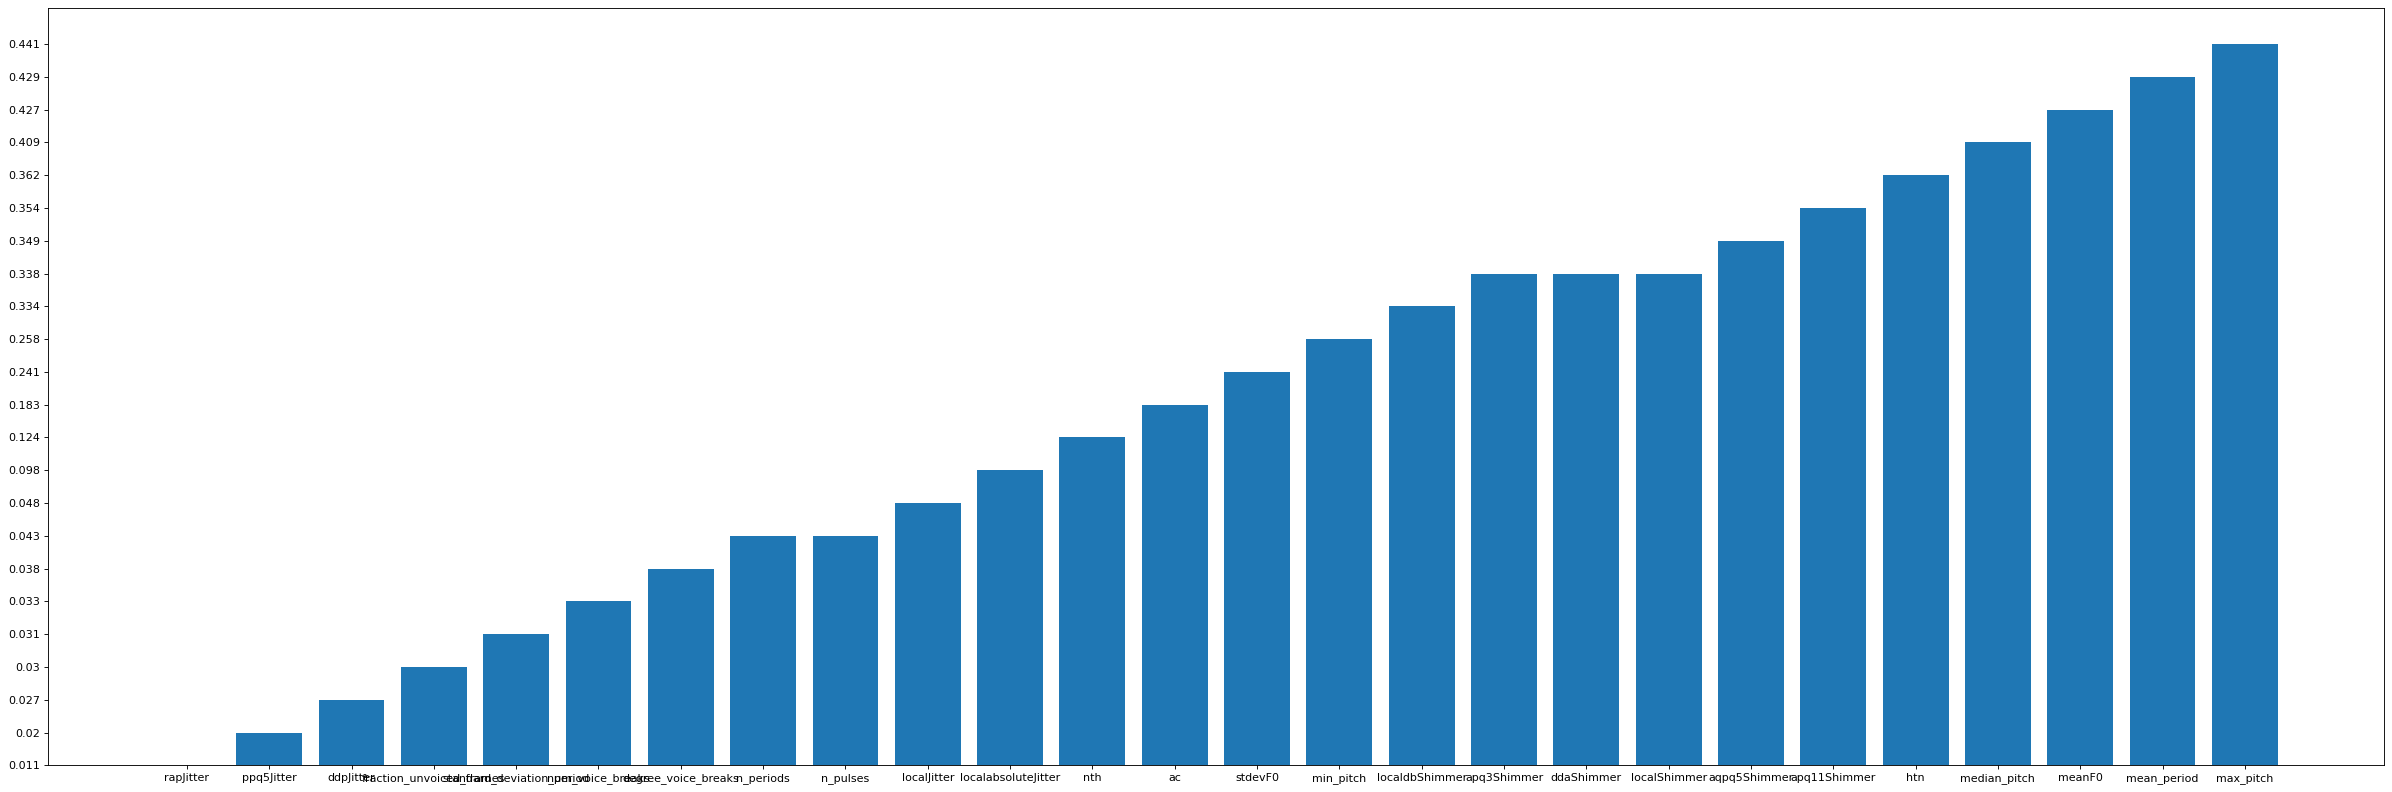

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(rel[:,1],rel[:,0])
plt.tight_layout()

### Feature importance

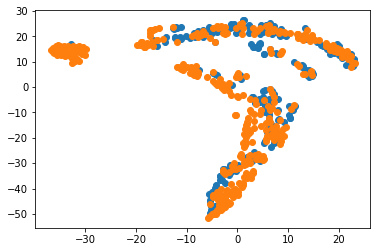

In [22]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
for i, t in enumerate(set(Y)):
    idx=Y==t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

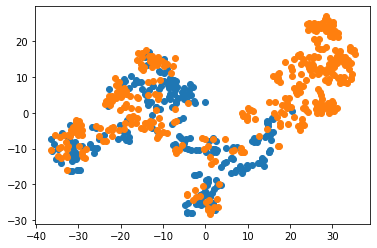

In [23]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled)

X_embedded = TSNE(n_components=2).fit_transform(X_norm)
for i, t in enumerate(set(Y)):
    idx=Y==t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

In [24]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X, Y)
imp=model.feature_importances_*100
print(imp)

[ 3.9195027   4.2985673   0.9970556   5.100893    1.456171    4.56204
  2.782117    4.620704    4.3223166   7.6603456   0.          2.4482694
  2.2918382   2.866163    1.4223144  14.322122    0.95569295  0.5936456
  9.22137     2.7104254   4.2120314   4.559046    1.9275446  10.217017
  1.457705    1.0750936 ]


In [25]:
rel=[[round(imp[i],3),X.columns[i]] for i in range(26)]
rel.sort(reverse=False)
rel=np.array(rel)
rel

array([['0.0', 'ddaShimmer'],
       ['0.594', 'min_pitch'],
       ['0.956', 'stdevF0'],
       ['0.997', 'rapJitter'],
       ['1.075', 'degree_voice_breaks'],
       ['1.422', 'median_pitch'],
       ['1.456', 'ddpJitter'],
       ['1.458', 'num_voice_breaks'],
       ['1.928', 'standard_deviation_period'],
       ['2.292', 'nth'],
       ['2.448', 'ac'],
       ['2.71', 'n_pulses'],
       ['2.782', 'localdbShimmer'],
       ['2.866', 'htn'],
       ['3.92', 'localJitter'],
       ['4.212', 'n_periods'],
       ['4.299', 'localabsoluteJitter'],
       ['4.322', 'aqpq5Shimmer'],
       ['4.559', 'mean_period'],
       ['4.562', 'localShimmer'],
       ['4.621', 'apq3Shimmer'],
       ['5.101', 'ppq5Jitter'],
       ['7.66', 'apq11Shimmer'],
       ['9.221', 'max_pitch'],
       ['10.217', 'fraction_unvoiced_frames'],
       ['14.322', 'meanF0']], dtype='<U32')

In [26]:
X.columns

Index(['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter',
       'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer',
       'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'ac', 'nth', 'htn',
       'median_pitch', 'meanF0', 'stdevF0', 'min_pitch', 'max_pitch',
       'n_pulses', 'n_periods', 'mean_period', 'standard_deviation_period',
       'fraction_unvoiced_frames', 'num_voice_breaks', 'degree_voice_breaks'],
      dtype='object')

In [27]:
from collections import Counter
Y=df['class']
Counter(Y)

Counter({0: 220, 1: 365})

## Train and validate on train data

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm, Y, test_size=0.3, random_state=42)

In [10]:
X_norm

NameError: name 'X_norm' is not defined

### Class weight vs Accuracy

In [118]:
w=0.2
weight=[]
train_acc=[]
train_f1=[]
test_acc=[]
test_f1=[]
while(w<5):
    classifier = RandomForestClassifier(n_estimators=50, random_state=5,class_weight={0:w,1:1})
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred))
    train_f1.append(f1_score(y_train, y_pred))
    y_pred = classifier.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    test_f1.append(f1_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred),w)
    weight.append(w)
    w+=0.1

[[107   9]
 [  9 124]] 0.2
[[105  11]
 [ 10 123]] 0.30000000000000004
[[107   9]
 [ 11 122]] 0.4
[[105  11]
 [ 10 123]] 0.5
[[107   9]
 [ 10 123]] 0.6
[[104  12]
 [  7 126]] 0.7
[[104  12]
 [  9 124]] 0.7999999999999999
[[103  13]
 [  8 125]] 0.8999999999999999
[[105  11]
 [  9 124]] 0.9999999999999999
[[103  13]
 [ 10 123]] 1.0999999999999999
[[104  12]
 [  7 126]] 1.2
[[106  10]
 [ 10 123]] 1.3
[[105  11]
 [ 10 123]] 1.4000000000000001
[[103  13]
 [ 10 123]] 1.5000000000000002
[[105  11]
 [ 10 123]] 1.6000000000000003
[[104  12]
 [  9 124]] 1.7000000000000004
[[104  12]
 [ 10 123]] 1.8000000000000005
[[104  12]
 [ 10 123]] 1.9000000000000006
[[105  11]
 [  8 125]] 2.0000000000000004
[[105  11]
 [  7 126]] 2.1000000000000005
[[105  11]
 [  6 127]] 2.2000000000000006
[[105  11]
 [  6 127]] 2.3000000000000007
[[105  11]
 [  7 126]] 2.400000000000001
[[104  12]
 [  6 127]] 2.500000000000001
[[106  10]
 [  6 127]] 2.600000000000001
[[105  11]
 [  7 126]] 2.700000000000001
[[106  10]
 [  7

In [73]:
weight[]

0.2

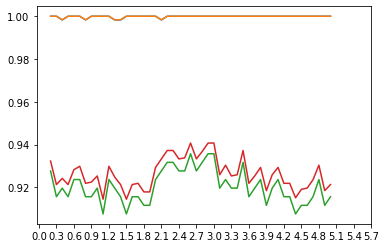

In [119]:
plt.plot(weight,train_acc)
plt.plot(weight,train_f1)
plt.plot(weight,test_acc)
plt.plot(weight,test_f1)
plt.xticks(np.arange(0, 6, 0.3))
plt.show()

In [120]:
test_f1

[0.9323308270676691,
 0.9213483146067416,
 0.9242424242424241,
 0.9213483146067416,
 0.9283018867924527,
 0.9298892988929889,
 0.9219330855018587,
 0.9225092250922509,
 0.9253731343283582,
 0.9144981412639406,
 0.9298892988929889,
 0.924812030075188,
 0.9213483146067416,
 0.9144981412639406,
 0.9213483146067416,
 0.9219330855018587,
 0.917910447761194,
 0.917910447761194,
 0.929368029739777,
 0.9333333333333333,
 0.937269372693727,
 0.937269372693727,
 0.9333333333333333,
 0.9338235294117647,
 0.9407407407407407,
 0.9333333333333333,
 0.9368029739776952,
 0.9407407407407407,
 0.9407407407407407,
 0.9259259259259258,
 0.9304029304029303,
 0.9253731343283582,
 0.9259259259259258,
 0.937269372693727,
 0.9219330855018587,
 0.9253731343283582,
 0.929368029739777,
 0.9185185185185184,
 0.9259259259259258,
 0.929368029739777,
 0.9219330855018587,
 0.9219330855018587,
 0.9151291512915128,
 0.9191176470588236,
 0.9197080291970802,
 0.9236363636363636,
 0.9304029304029303,
 0.9185185185185184,
 

### Train

In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=5,class_weight={0:1.9000000000000006,1:1})
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1.9000000000000006, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [114]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[317   0]
 [  0 345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       345

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662

1.0
1.0


### Validation data

In [115]:
X_test.shape

(166, 26)

In [116]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[71  5]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        76
           1       0.94      0.93      0.94        90

    accuracy                           0.93       166
   macro avg       0.93      0.93      0.93       166
weighted avg       0.93      0.93      0.93       166

0.9337349397590361
0.9385474860335196


In [108]:
import joblib
joblib.dump(classifier, "./random_forest.joblib")

['./random_forest.joblib']

### XGBoost

In [50]:
y_train

77     0
436    1
211    0
192    0
450    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: class, Length: 468, dtype: int64

In [53]:
w=0.2
weight=[]
train_acc=[]
train_f1=[]
test_acc=[]
test_f1=[]
while(w<5):
    model = XGBClassifier(class_weight={0:w,1:1})
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred))
    train_f1.append(f1_score(y_train, y_pred))
    y_pred = model.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    test_f1.append(f1_score(y_test, y_pred))
    weight.append(w)
    w+=0.1

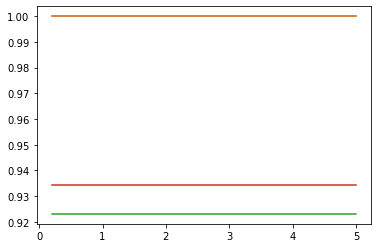

In [54]:
plt.plot(weight,train_acc)
plt.plot(weight,train_f1)
plt.plot(weight,test_acc)
plt.plot(weight,test_f1)

In [58]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier(class_weight={0:1.2,1:1})
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1.2, 1: 1},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
y_pred = model.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[172   0]
 [  0 296]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       296

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468

1.0


In [60]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[44  4]
 [ 5 64]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.94      0.93      0.93        69

    accuracy                           0.92       117
   macro avg       0.92      0.92      0.92       117
weighted avg       0.92      0.92      0.92       117

0.9230769230769231


### Neural Network

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [105]:
model = tf.keras.Sequential()
model.add(layers.Dense(12, input_dim=26, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [107]:
class_weights={0: 1,1: 1}

model.fit(X_train, y_train, epochs=300, batch_size=32,class_weight=class_weights)


Epoch 1/300
15/15 [==============================] - 0s 798us/step - loss: 8.8357 - accuracy: 0.5427
Epoch 2/300
15/15 [==============================] - 0s 931us/step - loss: 3.2093 - accuracy: 0.5385
Epoch 3/300
15/15 [==============================] - 0s 864us/step - loss: 1.9887 - accuracy: 0.5150
Epoch 4/300
15/15 [==============================] - 0s 931us/step - loss: 1.4364 - accuracy: 0.5321
Epoch 5/300
15/15 [==============================] - 0s 887us/step - loss: 1.1244 - accuracy: 0.6111
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 1.1102 - accuracy: 0.6282
Epoch 7/300
15/15 [==============================] - 0s 864us/step - loss: 0.9662 - accuracy: 0.6474
Epoch 8/300
15/15 [==============================] - 0s 780us/step - loss: 0.9004 - accuracy: 0.6560
Epoch 9/300
15/15 [==============================] - 0s 864us/step - loss: 0.8488 - accuracy: 0.6624
Epoch 10/300
15/15 [==============================] - 0s 762us/step - loss: 0.8308 - accuracy

15/15 [==============================] - 0s 730us/step - loss: 0.4360 - accuracy: 0.7650
Epoch 161/300
15/15 [==============================] - 0s 933us/step - loss: 0.4476 - accuracy: 0.7564
Epoch 162/300
15/15 [==============================] - 0s 796us/step - loss: 0.4451 - accuracy: 0.7692
Epoch 163/300
15/15 [==============================] - 0s 997us/step - loss: 0.4601 - accuracy: 0.7756
Epoch 164/300
15/15 [==============================] - 0s 667us/step - loss: 0.4651 - accuracy: 0.7650
Epoch 165/300
15/15 [==============================] - 0s 731us/step - loss: 0.4561 - accuracy: 0.7735
Epoch 166/300
15/15 [==============================] - 0s 796us/step - loss: 0.4935 - accuracy: 0.7457
Epoch 167/300
15/15 [==============================] - 0s 751us/step - loss: 0.4449 - accuracy: 0.7735
Epoch 168/300
15/15 [==============================] - 0s 765us/step - loss: 0.4400 - accuracy: 0.7821
Epoch 169/300
15/15 [==============================] - 0s 663us/step - loss: 0.4536 - a

In [108]:
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0

In [109]:
y_pred = model.predict(X_train)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[134  38]
 [ 60 236]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       172
           1       0.86      0.80      0.83       296

    accuracy                           0.79       468
   macro avg       0.78      0.79      0.78       468
weighted avg       0.80      0.79      0.79       468

0.7905982905982906


In [110]:
y_pred = model.predict(X_test)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[35 13]
 [12 57]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        48
           1       0.81      0.83      0.82        69

    accuracy                           0.79       117
   macro avg       0.78      0.78      0.78       117
weighted avg       0.79      0.79      0.79       117

0.7863247863247863


In [69]:
from sklearn import svm

clf = svm.SVC(kernel='linear',class_weight={0:1.1,1:1})
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1.1, 1: 1},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [278]:
df1=pd.read_csv('Data/Srilanka.csv')
df1=df1.loc[:, df1.columns !='Subject ID']
df1.columns=df.columns